# K-means

## Importer les dépendences

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## Importer le dataset

In [46]:
dataset = pd.read_csv('data/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
print(dataset.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## Utilisation de la méthode Elbow (coude en anglais) pour trouver le nombre optimal de clusters

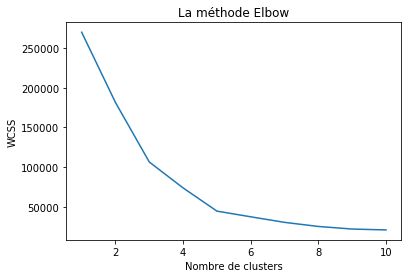

In [47]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('La méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

## Construction du modèle (avec le nombre optimal de clusters)

In [48]:
nb_clusters = 5
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = nb_clusters, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

## Visualiser les résultats

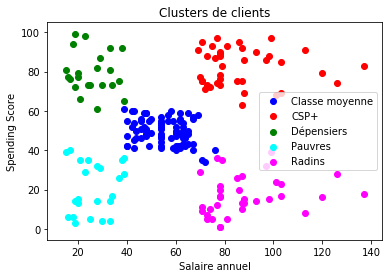

In [49]:
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'Classe moyenne')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'red', label = 'CSP+')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'green', label = 'Dépensiers')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'cyan', label = 'Pauvres')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'magenta', label = 'Radins')
plt.title('Clusters de clients')
plt.xlabel('Salaire annuel')
plt.ylabel('Spending Score')
plt.legend()